In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#LOAD DATA
record = pd.read_csv("credit_record.csv")
apl = pd.read_csv('application_record.csv')

DATA EXPLORE

In [3]:
apl

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
#FAMILY NAME STATS
apl['NAME_FAMILY_STATUS'].value_counts()

Married                 299828
Single / not married     55271
Civil marriage           36532
Separated                27251
Widow                    19675
Name: NAME_FAMILY_STATUS, dtype: int64

In [5]:
#SOME FINDINGS FROM THE DATASET:
#more femals than males
#F    294440
#M    144117

#more people with realty
#Y    304074
#N    134483
#Name: FLAG_OWN_REALTY, dtype: int64

#most people doesn't have kid
""" 0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
0Name: CNT_CHILDREN, dtype: int64 """


' 0     304071\n1      88527\n2      39884\n3       5430\n4        486\n5        133\n7          9\n9          5\n12         4\n6          4\n14         3\n19         1\n0Name: CNT_CHILDREN, dtype: int64 '

ADD CREDIT INFORMATION TO THE APPLICATION DATASET

In [6]:
record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
apl.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
record['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

<AxesSubplot:>

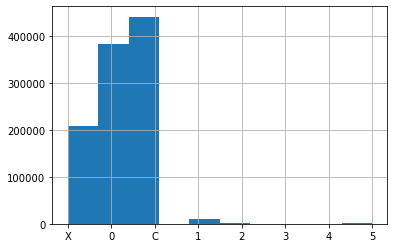

In [9]:
record['STATUS'].hist()

In [10]:
col_num=len(apl.columns)
print(col_num)


18


In [11]:
apl.columns[14]

'FLAG_PHONE'

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>],
       [<AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>],
       [<AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_EMAIL'}>],
       [<AxesSubplot:title={'center':'CNT_FAM_MEMBERS'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

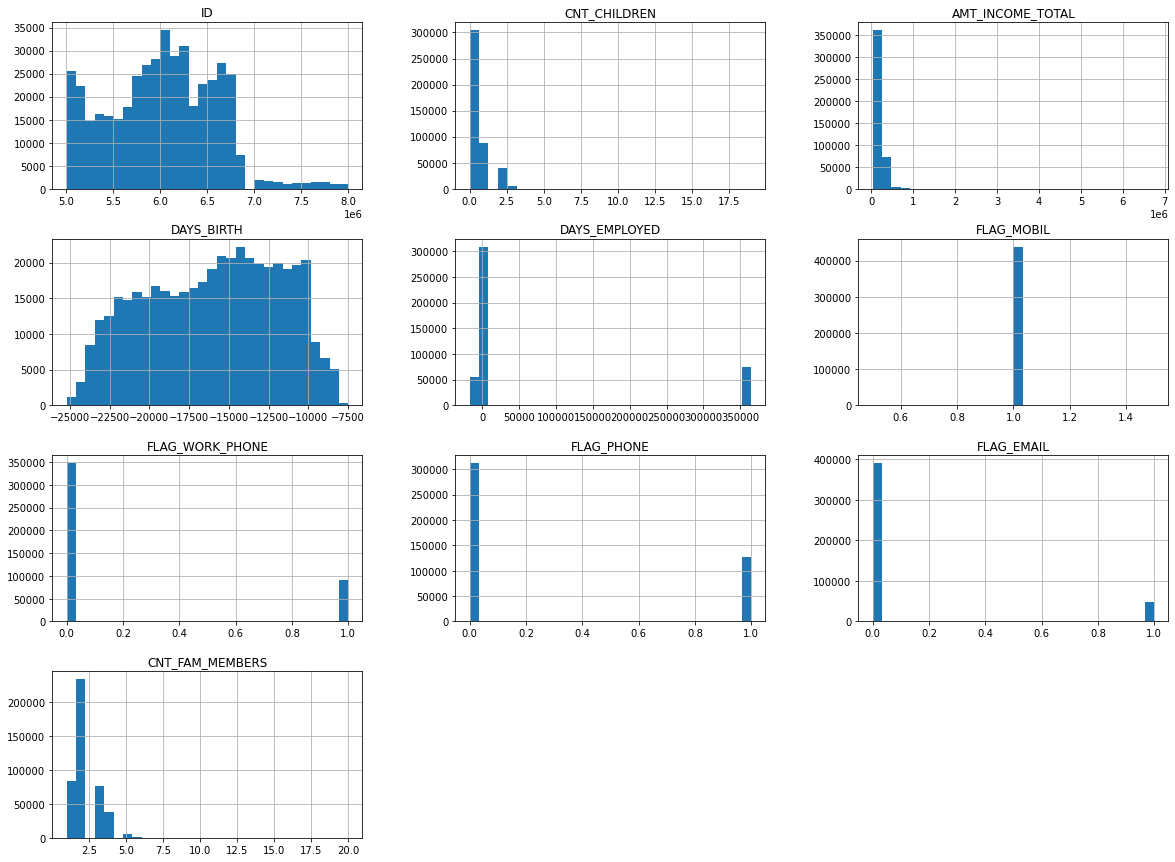

In [12]:
apl.hist(bins=30, figsize=(20, 15))

<AxesSubplot:>

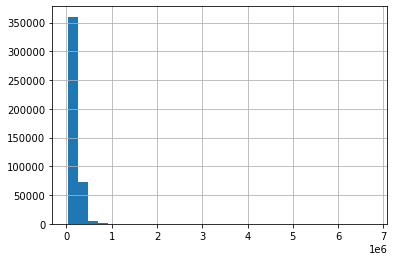

In [13]:
apl.AMT_INCOME_TOTAL.hist(bins=30)

<AxesSubplot:>

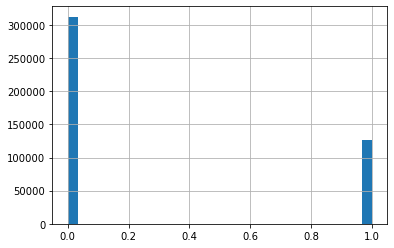

In [14]:
apl.FLAG_PHONE.hist(bins=30)

In [15]:
apl.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [16]:
apl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

Change catogorial data to numerical data and compute correlation matrix

In [17]:
#the result shows 4 catoegories have NAN values
(apl==0).any()
#four columns have 0 values, DOESN'T COMPOSE PROBLEM

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN            True
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE         True
FLAG_PHONE              True
FLAG_EMAIL              True
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

In [18]:
apl.isnull().any()
#occupation has NAN values, AND ONLY OCCUPATION HAVE NA VALUE

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [19]:
#group data by data type to find columns needed to be converted to int
g = apl.columns.to_series().groupby(apl.dtypes).groups

In [20]:
g
#as it turned out ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']
#are categorical  

{int64: ['ID', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], float64: ['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS'], object: ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']}

In [21]:
#define a new variable 
categorical=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']

In [22]:
apl[categorical] = apl[categorical].apply(lambda x: pd.factorize(x)[0])


In [23]:
#everything is converted to numerical value
apl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  int64  
 2   FLAG_OWN_CAR         438557 non-null  int64  
 3   FLAG_OWN_REALTY      438557 non-null  int64  
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  int64  
 7   NAME_EDUCATION_TYPE  438557 non-null  int64  
 8   NAME_FAMILY_STATUS   438557 non-null  int64  
 9   NAME_HOUSING_TYPE    438557 non-null  int64  
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

<h1 style='color:green'>CREATE CORRELATION MATRIX</h1>

In [24]:
#drop flag mobile and count since all value are 1
apl.FLAG_MOBIL.value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [25]:
apl1=apl.drop(columns='FLAG_MOBIL')

In [26]:
apl1.corr()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
ID,1.000000,-0.000545,-0.000063,-0.042709,-0.005178,0.011179,0.002359,-0.002689,-0.001439,0.000460,-0.004994,-0.002467,-0.023319,-0.018992,0.032875,0.001325,-0.001862
CODE_GENDER,-0.000545,1.000000,0.346580,-0.041982,-0.086101,-0.168807,0.129529,-0.026956,0.113618,-0.046824,-0.193781,0.167255,-0.026050,0.022300,-0.011416,-0.030268,-0.114188
FLAG_OWN_CAR,-0.000063,0.346580,1.000000,-0.001312,-0.115138,-0.188203,0.094607,0.073369,0.125896,-0.011121,-0.163770,0.165372,-0.008061,0.006606,-0.038601,-0.061669,-0.156943
FLAG_OWN_REALTY,-0.042709,-0.041982,-0.001312,1.000000,-0.001560,-0.025443,-0.032309,-0.000926,-0.003229,0.137262,0.106908,-0.064281,0.177372,0.078227,-0.062483,0.022869,-0.008070
CNT_CHILDREN,-0.005178,-0.086101,-0.115138,-0.001560,1.000000,0.019177,-0.133110,-0.028161,-0.126967,0.024246,0.349088,-0.241535,0.038418,-0.038266,0.028457,0.113529,0.884781
AMT_INCOME_TOTAL,0.011179,-0.168807,-0.188203,-0.025443,0.019177,1.000000,-0.003714,-0.171933,-0.009848,0.004361,0.053775,-0.141291,-0.033635,0.004444,0.112139,0.054554,0.011454
NAME_INCOME_TYPE,0.002359,0.129529,0.094607,-0.032309,-0.133110,-0.003714,1.000000,-0.053567,0.085830,-0.001049,-0.348516,0.539050,-0.153845,0.001396,-0.020314,-0.183132,-0.124684
NAME_EDUCATION_TYPE,-0.002689,-0.026956,0.073369,-0.000926,-0.028161,-0.171933,-0.053567,1.000000,0.012794,-0.004549,-0.068163,0.081519,-0.001546,-0.021321,-0.066599,-0.039764,-0.025025
NAME_FAMILY_STATUS,-0.001439,0.113618,0.125896,-0.003229,-0.126967,-0.009848,0.085830,0.012794,1.000000,0.011637,-0.171409,0.160950,-0.051856,-0.000564,-0.016264,-0.069973,-0.501328
NAME_HOUSING_TYPE,0.000460,-0.046824,-0.011121,0.137262,0.024246,0.004361,-0.001049,-0.004549,0.011637,1.000000,0.143550,-0.068590,0.012846,-0.016154,0.005283,0.034746,-0.002292


Text(0.5, 1.0, 'Correlation Heatmap')

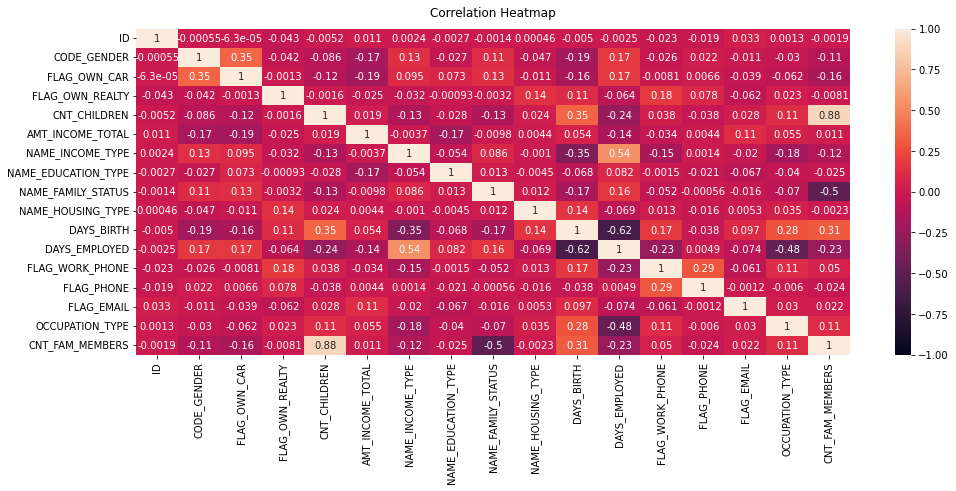

In [27]:
plt.figure(figsize=(16, 6))
heatmap=sns.heatmap(apl1.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title('Correlation Heatmap', pad=12)


<h1 style='color:green'>EXPLORE SECOND DATASET</h1>

In [28]:
record[record['ID']==5001712]

,ID,MONTHS_BALANCE,STATUS
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C
10,5001712,-6,C
11,5001712,-7,C
12,5001712,-8,C
13,5001712,-9,0


In [29]:
record.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [30]:
record.STATUS.replace({'C': -1, 'X' : -2}, inplace=True)
record.STATUS = record.STATUS.astype('int')

In [31]:
#groupby id then label risk or not depend on if defaut is over 2 months

In [32]:
record1=record.groupby('ID')['STATUS'].max().to_frame()

In [33]:
def label(x):
    if x >=2:
        return 'RISKY'
    else:
        return 'SAFE'

In [34]:
record1['label'] = record1.STATUS.apply(label)

In [35]:
record1.value_counts()

STATUS  label
 0      SAFE     34682
 1      SAFE      4683
-2      SAFE      4536
-1      SAFE      1417
 2      RISKY      336
 5      RISKY      195
 3      RISKY       88
 4      RISKY       48
dtype: int64

In [36]:
apl.columns.values

array(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype=object)

In [37]:
apl.shape

(438557, 18)

In [38]:
#drop status,to deal with duplication problem
#apl1.drop(['STATUS','ID'],inplace=True,axis=1)

In [39]:
record1

,STATUS,label
ID,,
5001711,0,SAFE
5001712,0,SAFE
5001713,-2,SAFE
5001714,-2,SAFE
5001715,-2,SAFE
...,...,...
5150482,0,SAFE
5150483,-2,SAFE
5150484,0,SAFE


In [40]:
apl1=apl.merge(record1['label'],how='inner',on='ID')

In [41]:
apl1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,label
0,5008804,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,-1,2.0,SAFE
1,5008805,0,0,0,0,427500.0,0,0,0,0,-12005,-4542,1,1,0,0,-1,2.0,SAFE
2,5008806,0,0,0,0,112500.0,0,1,1,1,-21474,-1134,1,0,0,0,0,2.0,SAFE
3,5008808,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,1,1.0,SAFE
4,5008809,1,1,0,0,270000.0,1,1,2,1,-19110,-3051,1,0,1,1,1,1.0,SAFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,0,0,0,0,315000.0,0,1,1,1,-17348,-2420,1,0,0,0,4,2.0,RISKY
36453,5149834,1,1,0,0,157500.0,1,0,1,1,-12387,-1325,1,0,1,1,12,2.0,RISKY
36454,5149838,1,1,0,0,157500.0,2,0,1,1,-12387,-1325,1,0,1,1,12,2.0,RISKY
36455,5150049,1,1,0,0,283500.0,0,1,1,1,-17958,-655,1,0,0,0,1,2.0,RISKY


In [42]:
apl_unique1 = apl1.groupby(['DAYS_EMPLOYED','DAYS_BIRTH','AMT_INCOME_TOTAL'])['ID'].count().to_frame()

apl_unique1


ID
DAYS_EMPLOYED DAYS_BIRTH AMT_INCOME_TOTAL    
-15713        -22895     180000.0           1
-15661        -22659     126000.0           4
-15227        -22098     162000.0           1
-15072        -21708     85500.0            3
-15038        -22101     202500.0          16
...                                        ..
 365243       -9861      90000.0           14
              -9699      243000.0           1
              -9614      225000.0           3
              -8149      157500.0           2
              -8145      112500.0           1

[9636 rows x 1 columns]

In [43]:
apl_unique2 = apl1.groupby(list(apl1.columns.values[1:-2]))['ID'].count().to_frame()

apl_unique2

ID
CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS NAME_HOUSING_TYPE DAYS_BIRTH DAYS_EMPLOYED FLAG_MOBIL FLAG_WORK_PHONE FLAG_PHONE FLAG_EMAIL OCCUPATION_TYPE    
0           0            0               0            54000.0          0                1                   1                  1                 -19986     -891          1          1               1          0           0                2
                                                      63000.0          2                1                   1                  1                 -24000      365243       1          0               0          0          -1                8
                                                      67500.0          0                1                   1                  1                 -19011     -3273         1          0               0          0           5                1
                                                                                                                                                 -16337     -2727         1          1               1          0          -1                5
                                                                       2                1                   1                  1                 -22981      365243       1          0               0          0          -1                5
...                                                                                                                                                                                                                                         ..
1           1            1               4            67500.0          1                1                   1                  1                 -13280     -280          1          1               0          0           1                1
                                                      112500.0         1                1                   1                  1                 -13015     -1375         1          1               1          0          -1                2
                                                      171000.0         3                1                   1                  1                 -12277     -1942         1          1               1          0           3                1
                                                      202500.0         0                3                   1                  1                 -12925     -2118         1          1               0          0          -1                1
                                         7            157500.0         0                1                   1                  1                 -13827     -1649         1          1               1          0           8                2

[9722 rows x 1 columns]

In [44]:
apl2 = apl1.sort_values(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'label'])

In [45]:
apl2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,label
18739,5074547,0,0,0,0,54000.0,0,1,1,1,-19986,-891,1,1,1,0,0,2.0,SAFE
18740,5074548,0,0,0,0,54000.0,0,1,1,1,-19986,-891,1,1,1,0,0,2.0,SAFE
15236,5061916,0,0,0,0,63000.0,2,1,1,1,-24000,365243,1,0,0,0,-1,2.0,SAFE
15237,5061917,0,0,0,0,63000.0,2,1,1,1,-24000,365243,1,0,0,0,-1,2.0,SAFE
15238,5061918,0,0,0,0,63000.0,2,1,1,1,-24000,365243,1,0,0,0,-1,2.0,SAFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25224,5100437,1,1,1,4,112500.0,1,1,1,1,-13015,-1375,1,1,1,0,-1,6.0,SAFE
7766,5036517,1,1,1,4,171000.0,3,1,1,1,-12277,-1942,1,1,1,0,3,6.0,SAFE
32762,5137518,1,1,1,4,202500.0,0,3,1,1,-12925,-2118,1,1,0,0,-1,6.0,SAFE
29826,5118330,1,1,1,7,157500.0,0,1,1,1,-13827,-1649,1,1,1,0,8,9.0,SAFE


In [46]:
apl2.columns.values

array(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'label'], dtype=object)

In [47]:
apl2_pv = apl2.pivot_table(index = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'label'], aggfunc ='size')

num_cards = pd.DataFrame(apl2_pv.values)
num_cards.columns = ['# of Cards']
num_cards

,# of Cards
0,2
1,8
2,1
3,5
4,5
...,...
9992,1
9993,2
9994,1
9995,1


In [48]:
apl3 = apl2.drop(columns='ID')
apl4 = apl3.drop_duplicates()
apl4

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,label
18739,0,0,0,0,54000.0,0,1,1,1,-19986,-891,1,1,1,0,0,2.0,SAFE
15236,0,0,0,0,63000.0,2,1,1,1,-24000,365243,1,0,0,0,-1,2.0,SAFE
15382,0,0,0,0,67500.0,0,1,1,1,-19011,-3273,1,0,0,0,5,2.0,SAFE
6496,0,0,0,0,67500.0,0,1,1,1,-16337,-2727,1,1,1,0,-1,2.0,SAFE
26032,0,0,0,0,67500.0,2,1,1,1,-22981,365243,1,0,0,0,-1,2.0,SAFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16493,1,1,1,4,67500.0,1,1,1,1,-13280,-280,1,1,0,0,1,6.0,SAFE
25223,1,1,1,4,112500.0,1,1,1,1,-13015,-1375,1,1,1,0,-1,6.0,SAFE
7766,1,1,1,4,171000.0,3,1,1,1,-12277,-1942,1,1,1,0,3,6.0,SAFE
32762,1,1,1,4,202500.0,0,3,1,1,-12925,-2118,1,1,0,0,-1,6.0,SAFE


In [49]:
apl5 = apl4.reset_index()
apl6 = apl5.drop(columns='index')
apl6

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,label
0,0,0,0,0,54000.0,0,1,1,1,-19986,-891,1,1,1,0,0,2.0,SAFE
1,0,0,0,0,63000.0,2,1,1,1,-24000,365243,1,0,0,0,-1,2.0,SAFE
2,0,0,0,0,67500.0,0,1,1,1,-19011,-3273,1,0,0,0,5,2.0,SAFE
3,0,0,0,0,67500.0,0,1,1,1,-16337,-2727,1,1,1,0,-1,2.0,SAFE
4,0,0,0,0,67500.0,2,1,1,1,-22981,365243,1,0,0,0,-1,2.0,SAFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1,1,1,4,67500.0,1,1,1,1,-13280,-280,1,1,0,0,1,6.0,SAFE
9993,1,1,1,4,112500.0,1,1,1,1,-13015,-1375,1,1,1,0,-1,6.0,SAFE
9994,1,1,1,4,171000.0,3,1,1,1,-12277,-1942,1,1,1,0,3,6.0,SAFE
9995,1,1,1,4,202500.0,0,3,1,1,-12925,-2118,1,1,0,0,-1,6.0,SAFE


In [50]:
apl_final = pd.concat([apl6, num_cards], axis = 1)

apl_final

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,label,# of Cards
0,0,0,0,0,54000.0,0,1,1,1,-19986,-891,1,1,1,0,0,2.0,SAFE,2
1,0,0,0,0,63000.0,2,1,1,1,-24000,365243,1,0,0,0,-1,2.0,SAFE,8
2,0,0,0,0,67500.0,0,1,1,1,-19011,-3273,1,0,0,0,5,2.0,SAFE,1
3,0,0,0,0,67500.0,0,1,1,1,-16337,-2727,1,1,1,0,-1,2.0,SAFE,5
4,0,0,0,0,67500.0,2,1,1,1,-22981,365243,1,0,0,0,-1,2.0,SAFE,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,1,1,1,4,67500.0,1,1,1,1,-13280,-280,1,1,0,0,1,6.0,SAFE,1
9993,1,1,1,4,112500.0,1,1,1,1,-13015,-1375,1,1,1,0,-1,6.0,SAFE,2
9994,1,1,1,4,171000.0,3,1,1,1,-12277,-1942,1,1,1,0,3,6.0,SAFE,1
9995,1,1,1,4,202500.0,0,3,1,1,-12925,-2118,1,1,0,0,-1,6.0,SAFE,1


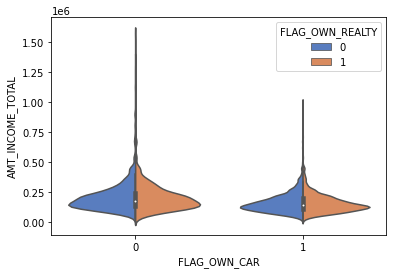

In [51]:
sns.violinplot(x='FLAG_OWN_CAR',y='AMT_INCOME_TOTAL',hue='FLAG_OWN_REALTY',data=apl_final, palette='muted',split=True)
plt.show()

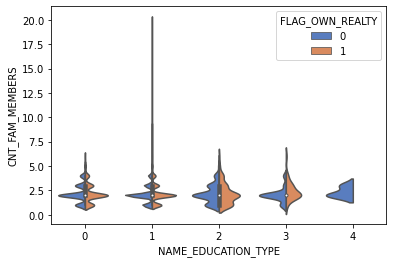

In [52]:
sns.violinplot(x='NAME_EDUCATION_TYPE',y='CNT_FAM_MEMBERS',hue='FLAG_OWN_REALTY',data=apl_final, palette='muted',split=True)
plt.show()